<a href="https://colab.research.google.com/github/moses-y/Data-Science-Machine-Learning/blob/main/RegressionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Housing Dataset Regression Analysis** 

## **Introduction**

In this project, we will perform regression analysis on a housing dataset using Python. The goal is to develop a regression model that can predict the target variable based on the features in the dataset.

## **Dataset**

The housing dataset contains information on various features of houses such as the number of rooms, square footage, location, etc. The target variable is the price of the house.

To load a csv file from Google Drive to a Colab notebook, you first need to mount your Google Drive in Colab. Here's how you can do it:

    Run the following code to mount your Google Drive:

In [9]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [10]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [11]:
!pwd

/content/drive/MyDrive


## Read The Data
    Grant the necessary permissions to Colab to access your Google Drive.

    Once your Google Drive is mounted, you can load your csv file as follows:

In [19]:
# Load dataset
import pandas as pd

file_path = '/content/drive/MyDrive/HousingData.csv'
df = pd.read_csv(file_path)

# Explore the data
print(df.head())



      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [20]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.1057

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [22]:
#Check for missing Values
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [23]:
"""We can see that there are quite a lot of missing values in the dataset. For convinience, I will fill them by the mean of respective columns."""


df = df.fillna(df.mean())

#you can drop or use median or mode

In [25]:
#Check again for missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

> Now, we can see that there are no missing values in the data.

# **Analysis**

The analysis consists of the following steps:

    Load the dataset into Python.
    Check for Missing Values
    Handle missing values
    Explore the data using data visualization techniques such as scatter plots, histograms, and box plots.

## Feature Vector and Target Variable

In [33]:
# Declare feature vector and target variable
X = df[['LSTAT','RM','NOX','PTRATIO','DIS','AGE','TAX']]
y = df['MEDV']

Here, I have selcted the following 6 variables as feature vectors for convinience.

    1 LSTAT - lower status of the population
    2 RM - average number of rooms per housing
    3 NOX - nitric oxides concentration (parts per 10 million)
    4 PTRATIO - pupil-teacher ratio by town
    5 DIS - weighted distances to five Boston employment centres
    6 AGE - proportion of owner-occupied units built prior to 1940
    7 TAX - full-value property-tax rate per $10,000

The target variable is MEDV which stands for Median value of owner-occupied homes.
    The dataset description can be found at -

https://www.kaggle.com/kyasar/boston-housing



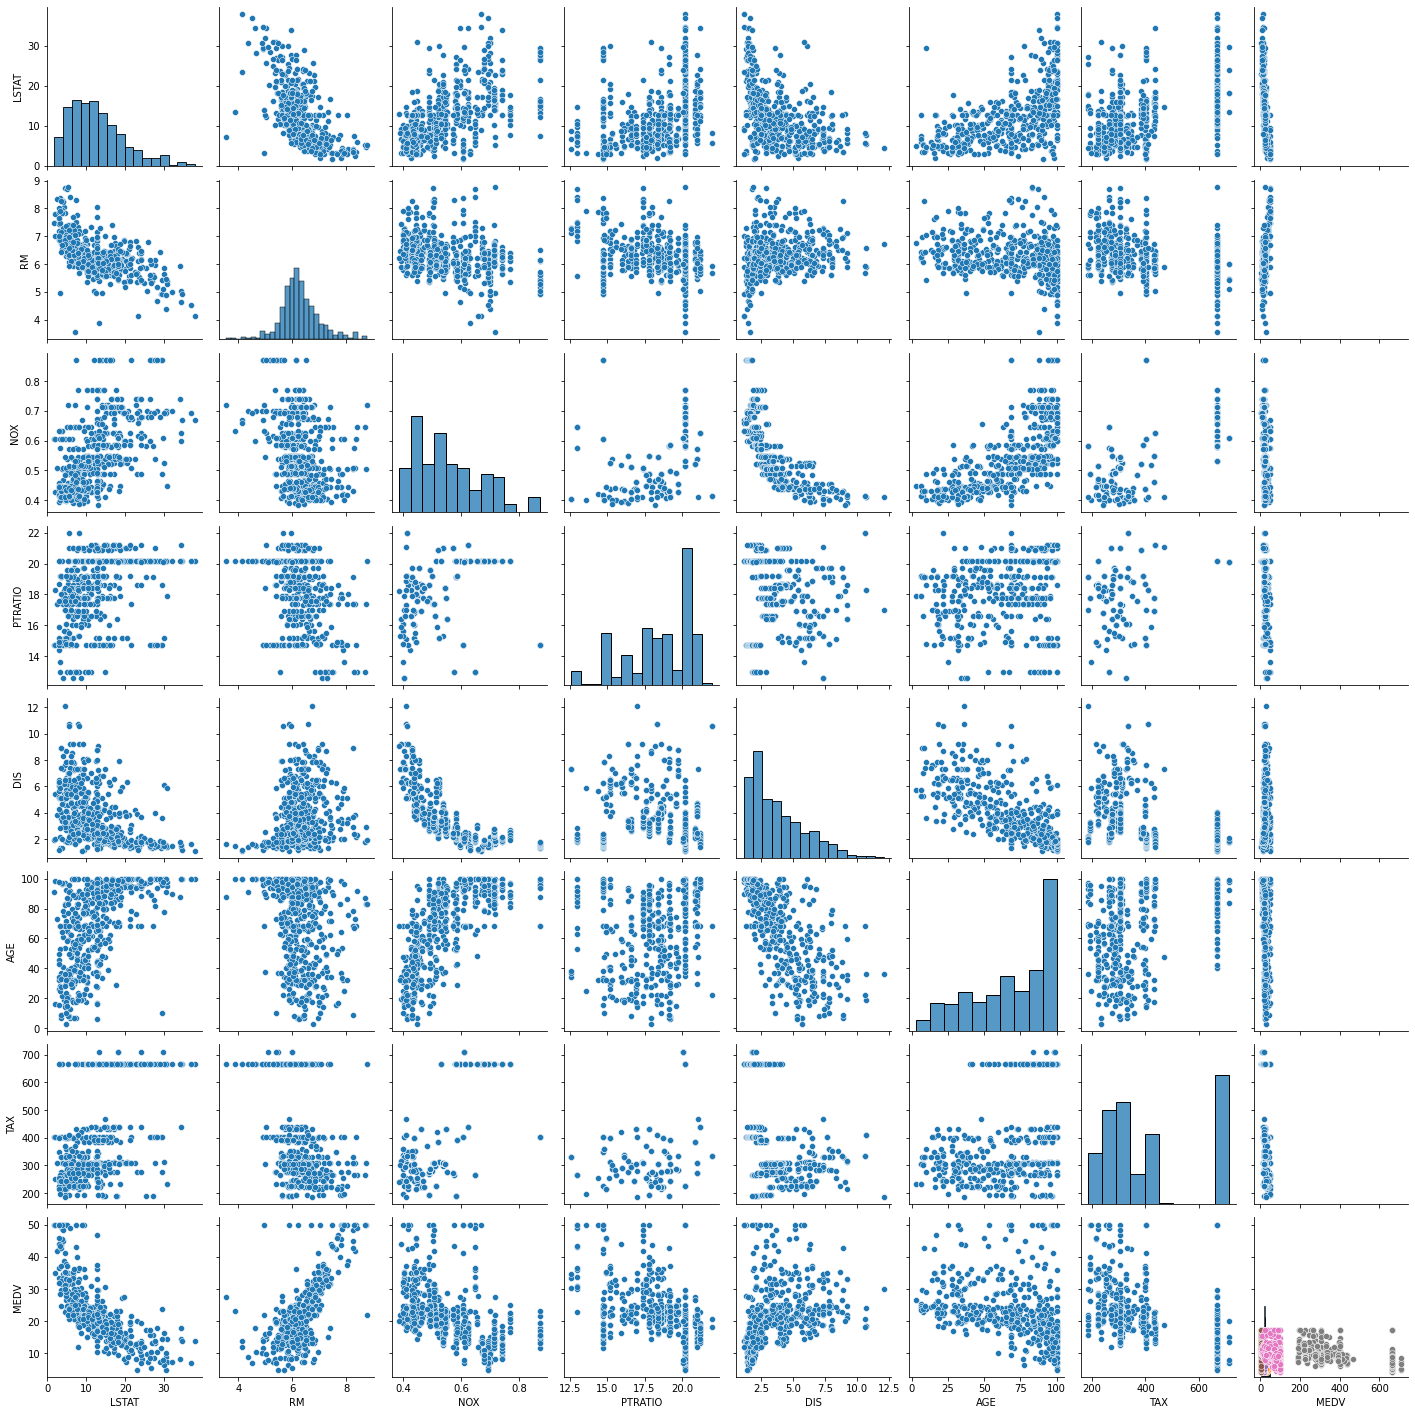

In [34]:
import seaborn as sns

# Create a new dataframe with both the feature vector and target variable
df_viz = pd.concat([X, y], axis=1)

# Use pairplot to visualize the relationship between all pairs of variables
sns.pairplot(df_viz)

# Use scatterplot to visualize the relationship between each feature and target variable
for feature in X.columns:
    sns.scatterplot(x=feature, y='MEDV', data=df_viz)


The `pairplot` function will create a grid of scatterplots that show the relationship between all pairs of variables in the dataframe. This can be useful to identify any patterns or correlations between the variables.

The ``scatterplot`` function will create a scatterplot for each feature in the feature vector, showing its relationship with the target variable. This can be useful to identify any linear or nonlinear relationships between individual features and the target variable.

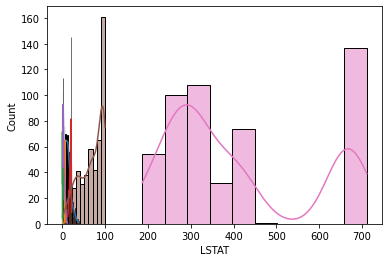

In [38]:

  
# Histogram of target variable
for feature in X.columns:
  sns.histplot(x=feature, data=df_viz, kde=True)



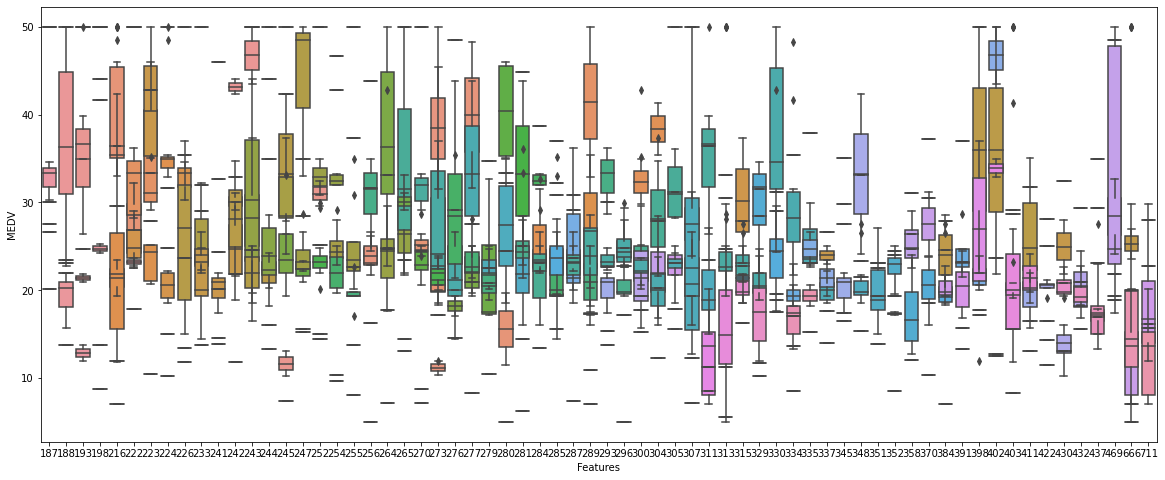

In [47]:
# Box plot of feature vs target
import matplotlib.pyplot as plt

# Set the size of the plot
fig, ax = plt.subplots(figsize=(20, 8))

for feature in X.columns:
  sns.boxplot(x=feature, y='MEDV', data=df_viz)



# Set the labels for the plot
ax.set_xlabel('Features')
ax.set_ylabel('MEDV')

# Show the plot
plt.show()


In [57]:
# Regression analysis
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split

X = df[['LSTAT','RM','PTRATIO','NOX','DIS','AGE','TAX']]
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))


#LogisticRegression
#log_reg = LogisticRegression()
#log_reg.fit(X_train, y_train)
#y_pred = log_reg.predict(X_test)
#print("Accuracy:", accuracy_score(y_test, y_pred))


R-squared: 0.6126881525929011


This code only includes linear regression, which is appropriate for predicting continuous variables like the median value of owner-occupied homes in $1000s represented by `y`. 

The code will fit a linear regression model on the training data, predict the median home values for the test data, and calculate the `R-squared score` as a measure of how well the `model` fits the data.


# Conclusion

Regression analysis is a powerful technique for predicting the value of a target variable based on other variables in the dataset. By following the steps outlined in this project, we were able to develop a regression model for the housing dataset and evaluate its performance. This project serves as a good introduction to regression analysis and provides a foundation for more complex analyses in the future.